# Spotify data EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df4=pd.read_csv('spotify.csv')

In [5]:
df4.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [84]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [85]:
# 1. Checking for null values and duplicate rows
df4.isnull().sum() #no null value found

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [86]:
df4.duplicated().sum() #24 duplicate rows found

27

In [87]:
df4 = df4.drop_duplicates()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


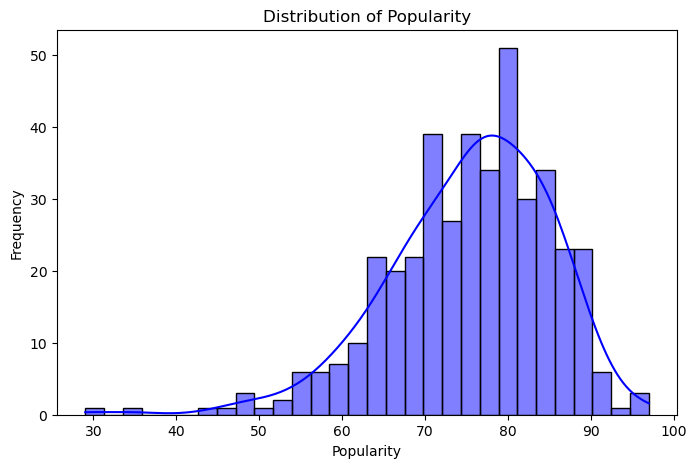

In [88]:
# 2. Distribution of Popularity
plt.figure(figsize=(8, 5))
sns.histplot(df4['Popularity'], bins=30, kde=True, color='blue')
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

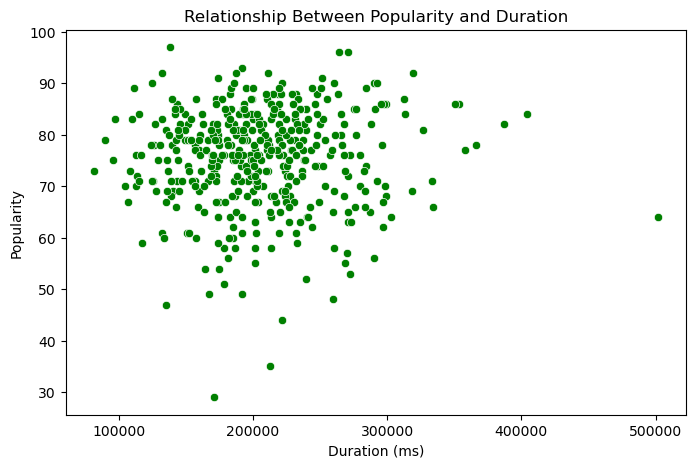

In [89]:
# 3. Relationship Between Popularity and Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df4, color='green')
plt.title("Relationship Between Popularity and Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

Artist with Highest Number of Tracks:
 Artist
Drake    17
Name: count, dtype: int64


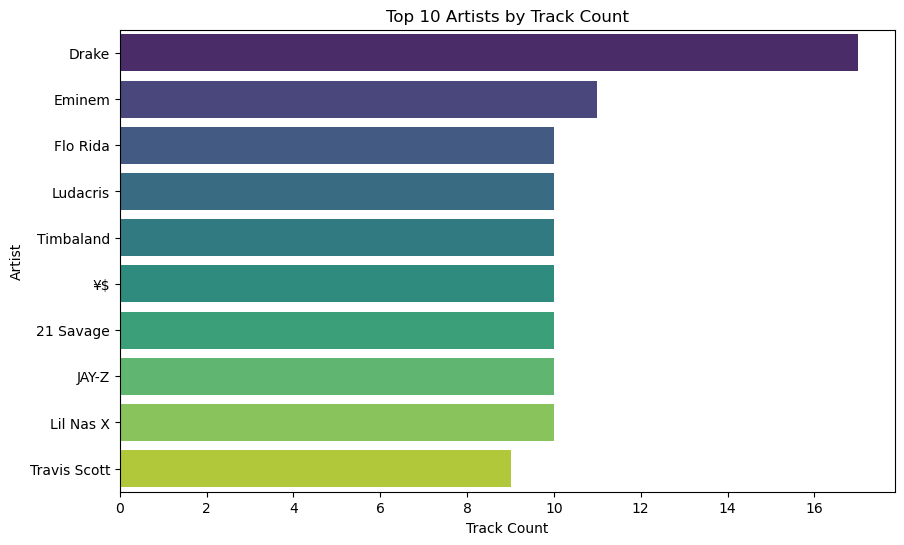

In [90]:
# 4. Artist with the Highest Number of Tracks
artist_track_count = df4['Artist'].value_counts()# 6. Top 5 Least Popular Tracks
least_popular_tracks = df4.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)
print("Artist with Highest Number of Tracks:\n", artist_track_count.head(1))
plt.figure(figsize=(10, 6))
sns.countplot(y='Artist', data=df4, order=df4['Artist'].value_counts().index[:10], palette='viridis')
plt.title("Top 10 Artists by Track Count")
plt.xlabel("Track Count")
plt.ylabel("Artist")
plt.show()

In [110]:
# 5. Top 5 Least Popular Tracks
least_popular_tracks = df4.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
least_popular_tracks

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [104]:
list_pupular_Track_Name=df4.groupby('Track Name')['Popularity'].sum().sort_values(ascending=True).head()

In [105]:
list_pupular_Track_Name

Track Name
Attachments (feat. Coi Leray)    29
Intentions                       35
Splash Brothers                  44
On Me - Remix                    47
911 (feat. Mary J. Blige)        48
Name: Popularity, dtype: int64

In [109]:
# 6. Top 5 Most Popular Artists by Average Popularity
top_artists = df4.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
top_artists

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

In [114]:
# 7. Most Popular Tracks for Top 5 Artists
most_popular_tracks = {}
for artist in top_artists.index:
    artist_tracks = df4[df4['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]['Track Name']
    most_popular_tracks[artist] = most_popular_track
most_popular_track

'CARNIVAL'

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


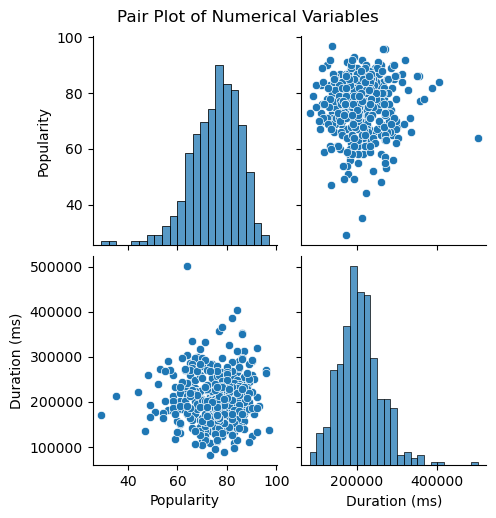

In [115]:
# 8. Pair Plot of Numerical Variables
sns.pairplot(df4[['Popularity', 'Duration (ms)']])
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

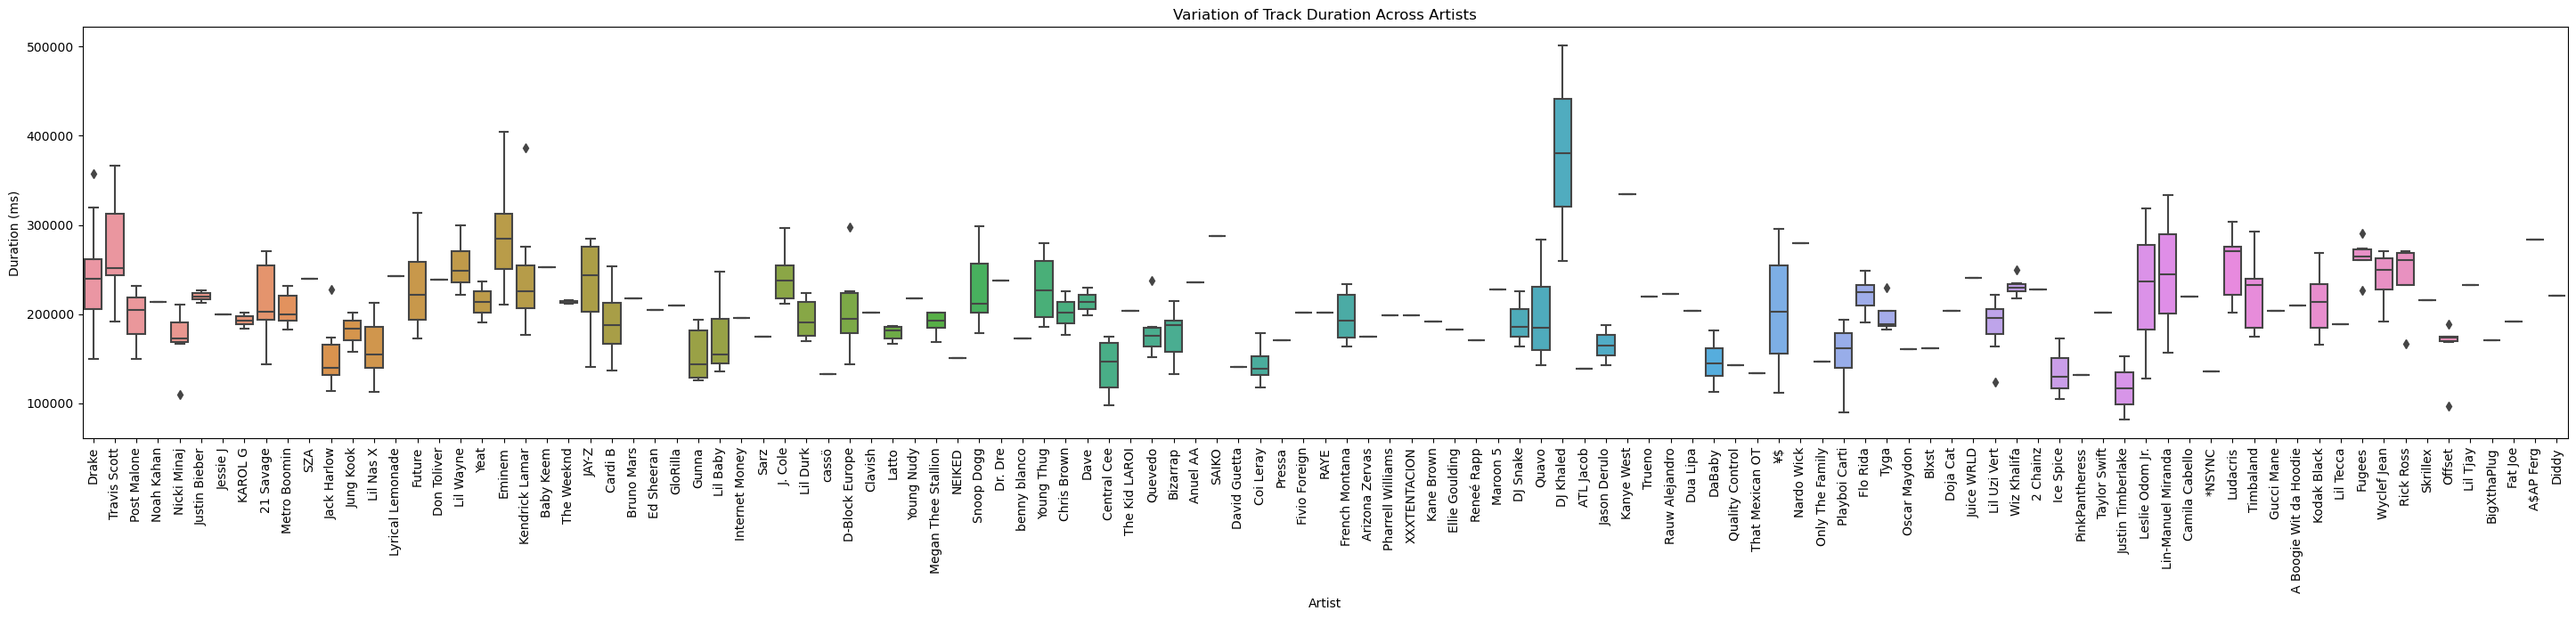

In [119]:
# 9. Variation of Track Duration Across Artists
plt.figure(figsize=(36, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df4)
plt.title("Variation of Track Duration Across Artists")
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.show()

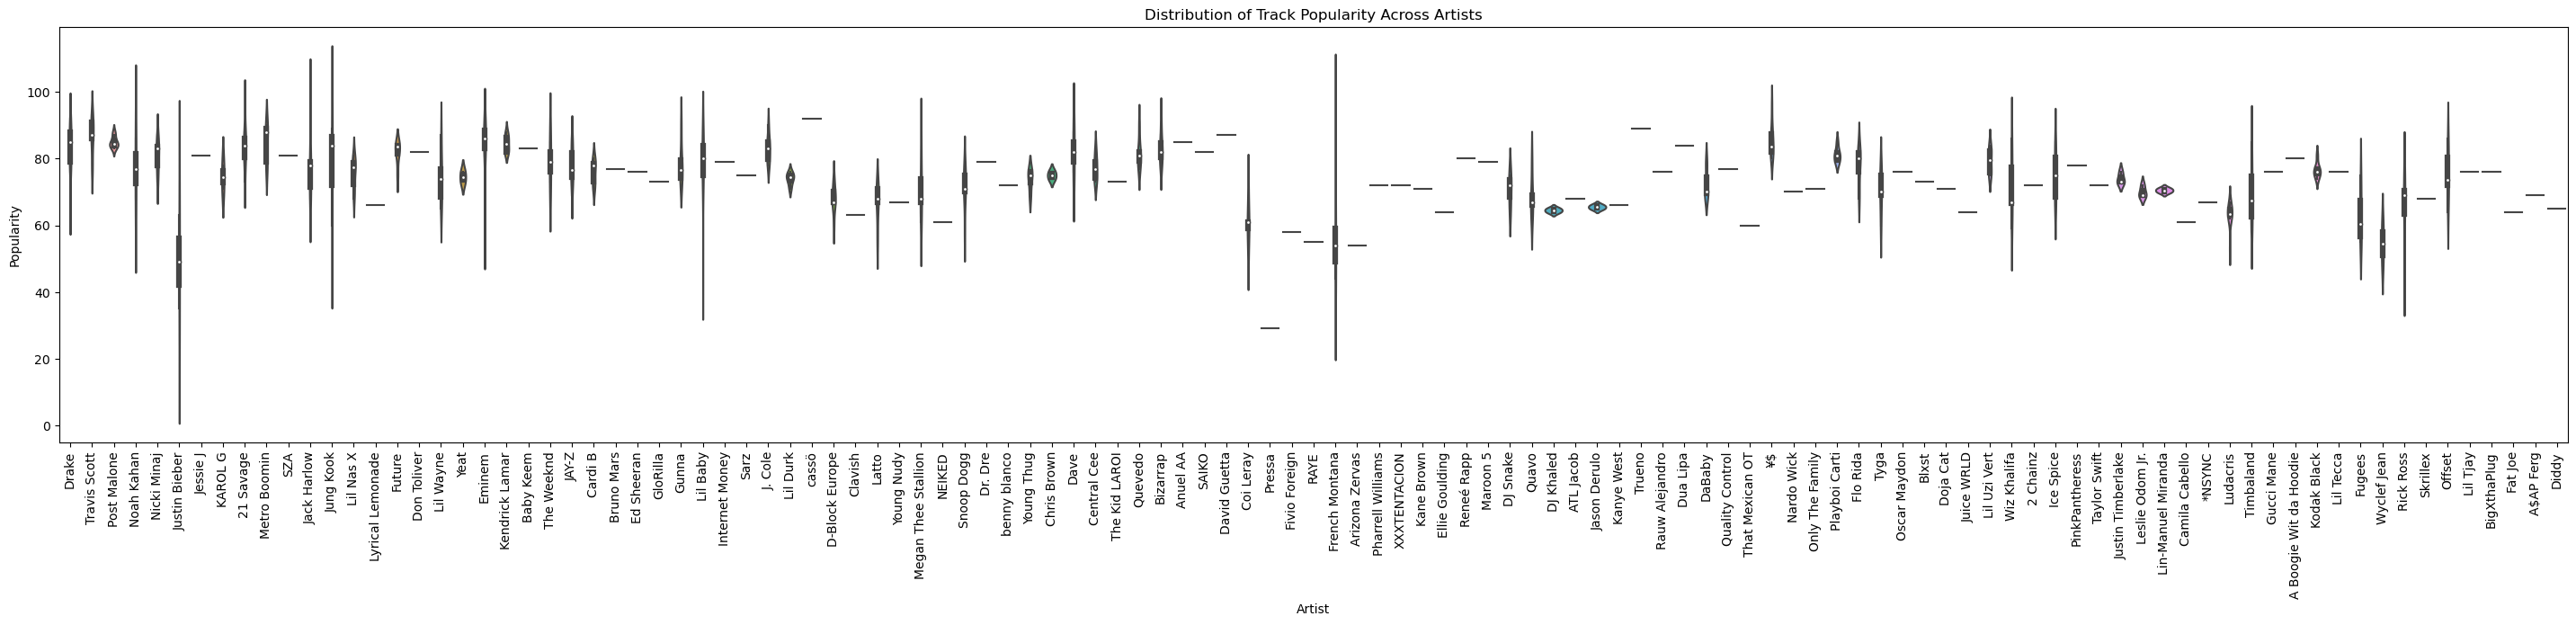

In [120]:
# 11. Distribution of Track Popularity Across Artists
plt.figure(figsize=(36, 6))
sns.violinplot(x='Artist', y='Popularity', data=df4)
plt.title("Distribution of Track Popularity Across Artists")
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.show()